In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
! which python

/Users/totucuong/miniconda3/envs/spectrumdev/bin/python


In [4]:
from JSAnimation import IPython_display


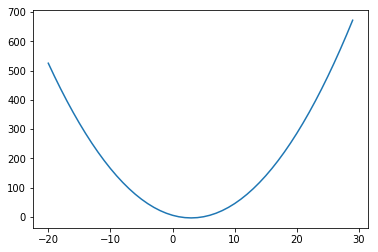

In [5]:
xlist=np.arange(-20,30,1)
f = lambda x: x**2-6*x+5
flist = [f(x) for x in xlist]
plt.plot(xlist, flist);

# Gradient Descent

In [7]:
def grad_des1d(f, fprime, step=0.01, maxsteps=0, precision=0.001, start=25):
    '''
    Parameters:
        f: the function to be optimized
        fprime: the derivative of f
        step: control how much we want to step in each iteration
    '''
    mins = []
    costs = []
    old=0
    current = start
    mins.append(start)
    counter = 0
    while abs(current - old) > precision:
        old = current 
        gradient = fprime(old) 
        move = gradient * step
        current = old - move
        mins.append(current)
        if maxsteps:
            counter+=1
            if counter == maxsteps:
                break
 
    return mins

In [8]:
def animator(f, xvals, xdatafn, ydatafn, frameskip, ax, line):
    
    fvals=[f(x) for x in xvals]
    ax.plot(xvals, fvals, lw=3)
    line, = ax.plot([], [], "D", markersize=12)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        x_n = xdatafn(i, frameskip)
        y_n = ydatafn(i)
        line.set_data(x_n, y_n)
        return line,
    return init, animate

In [9]:
fmins = grad_des1d(f, lambda x: 2*x - 6)



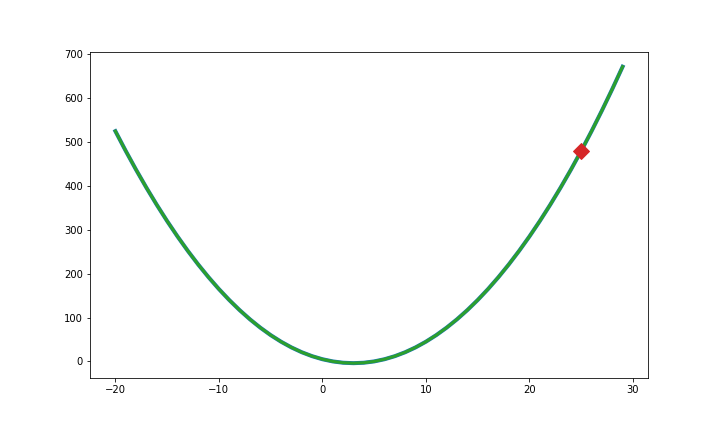
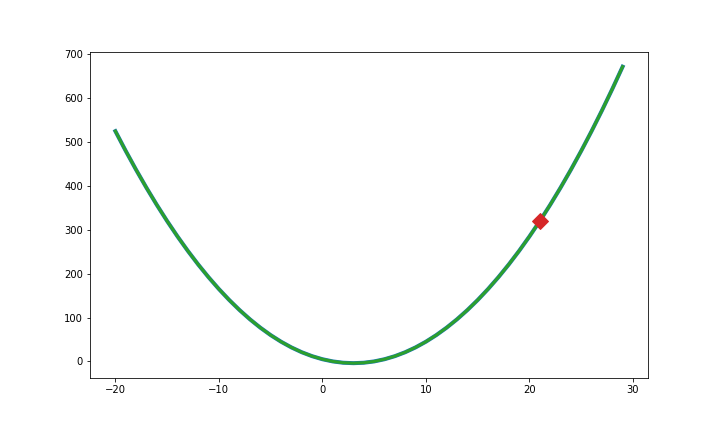
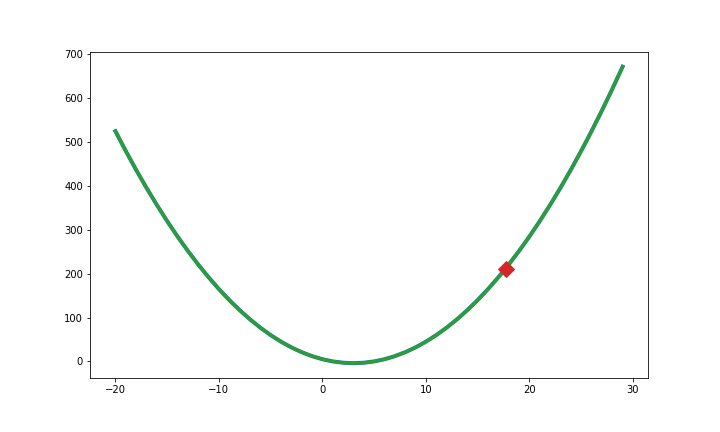
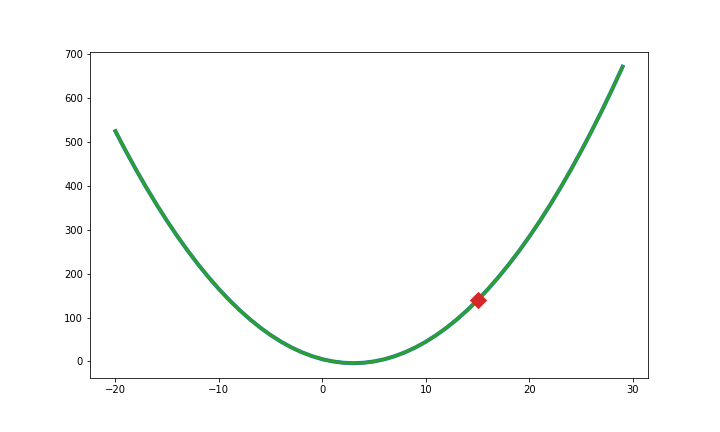
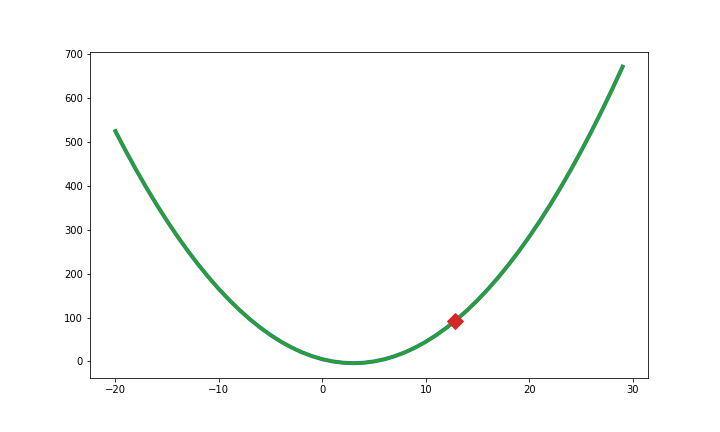
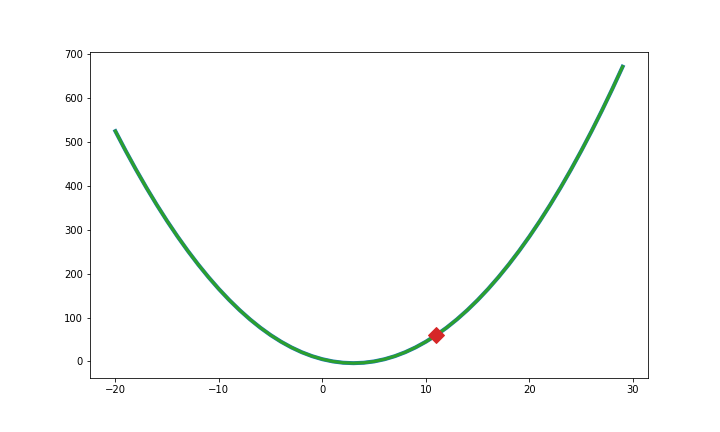
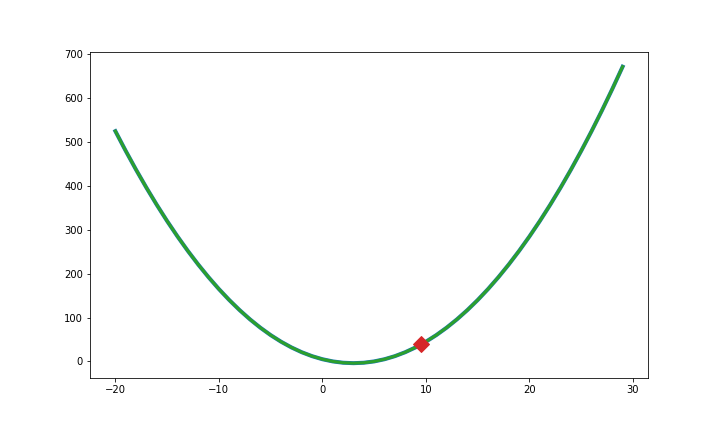
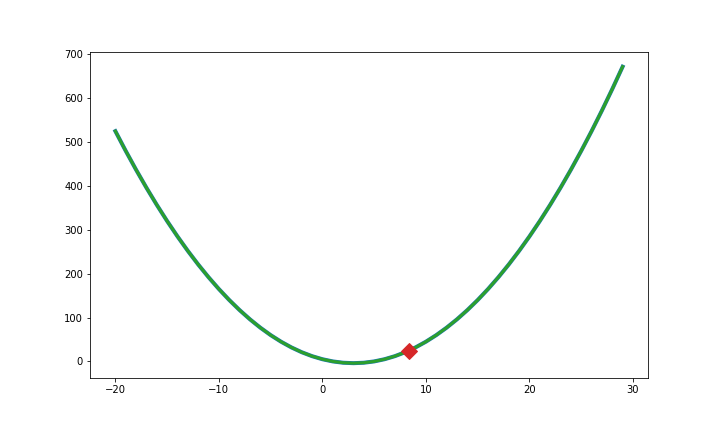
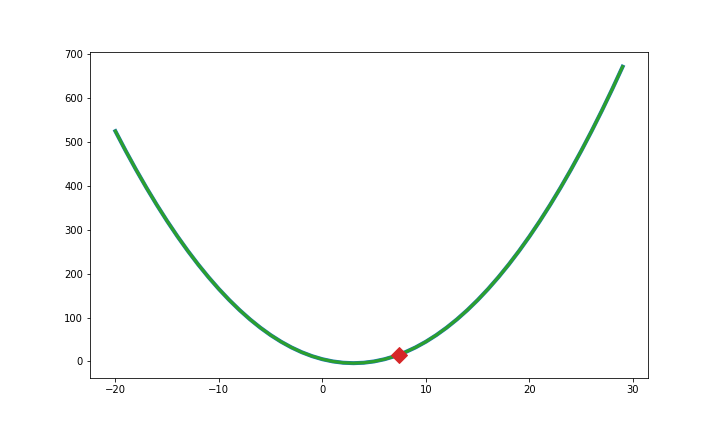
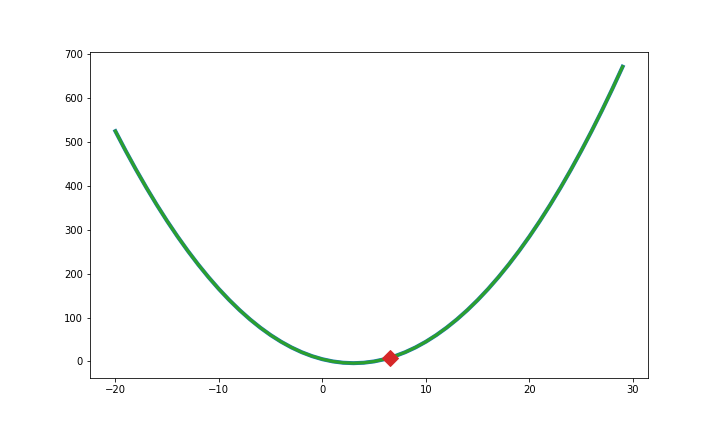
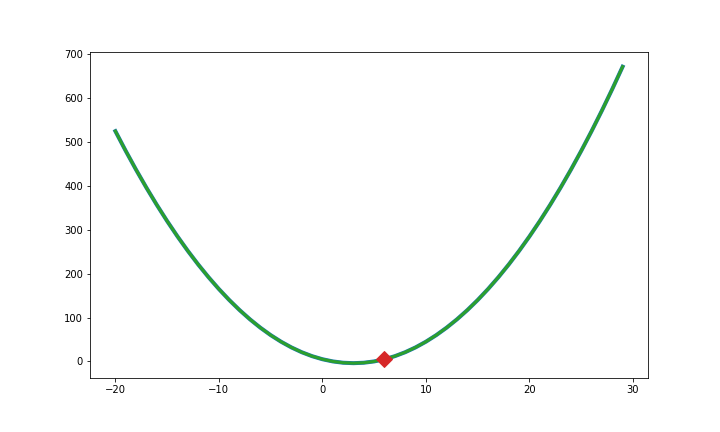
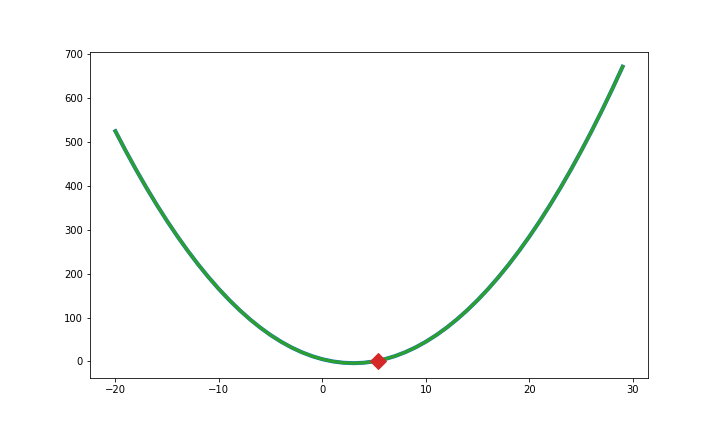
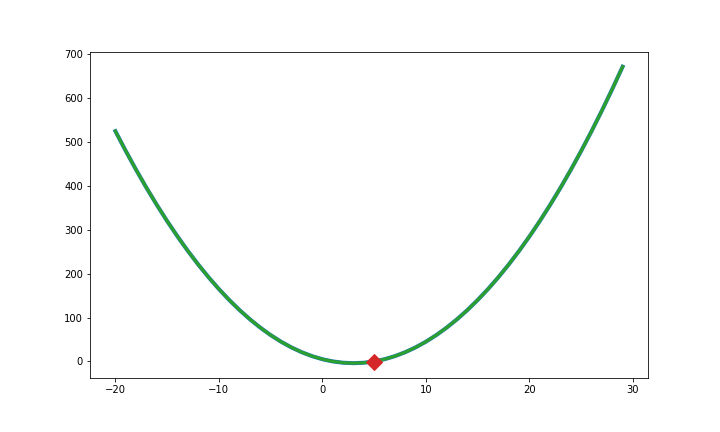
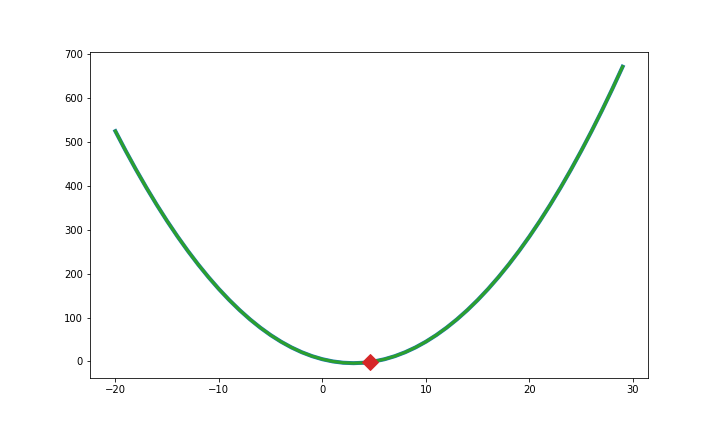
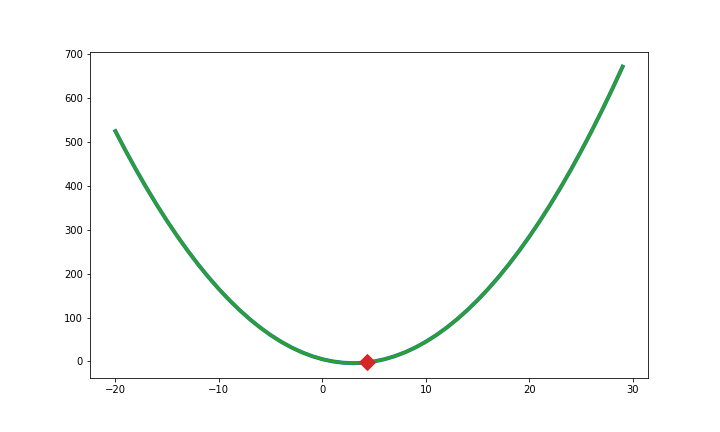
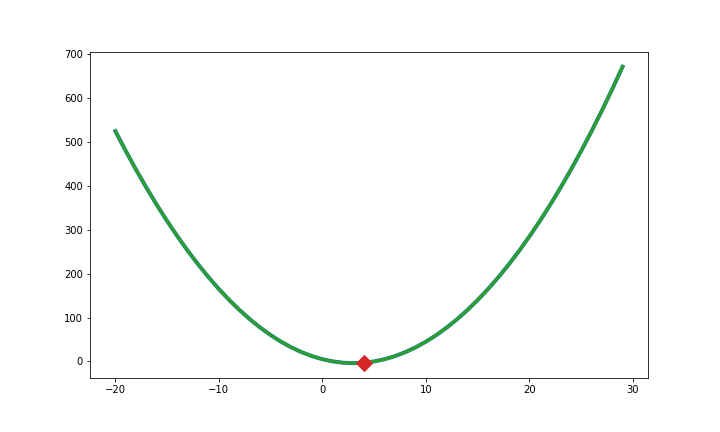
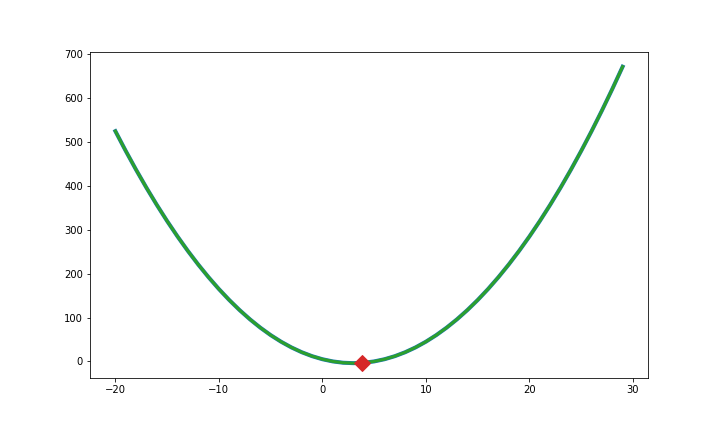
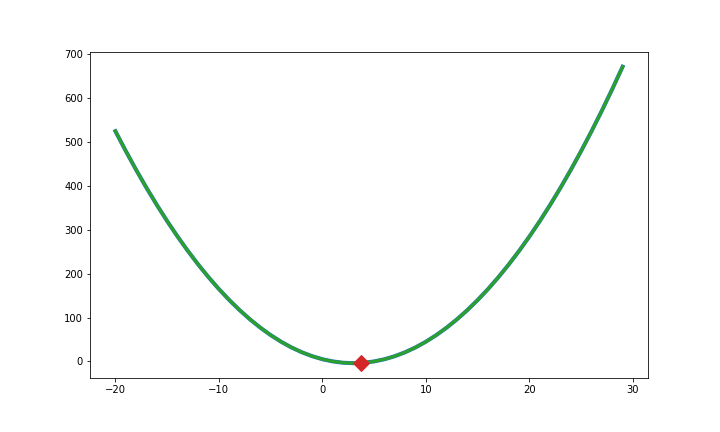
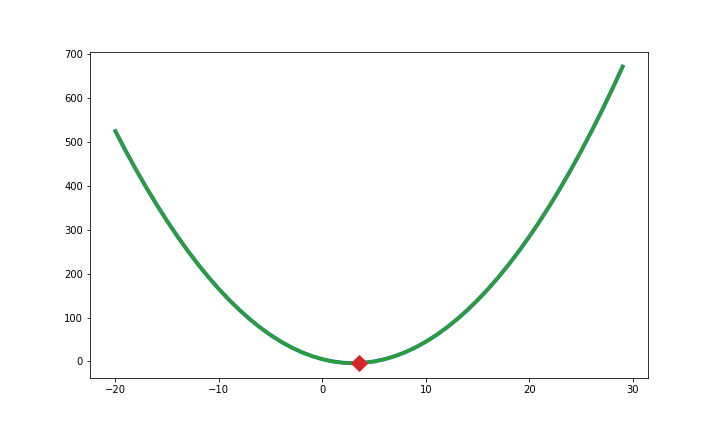
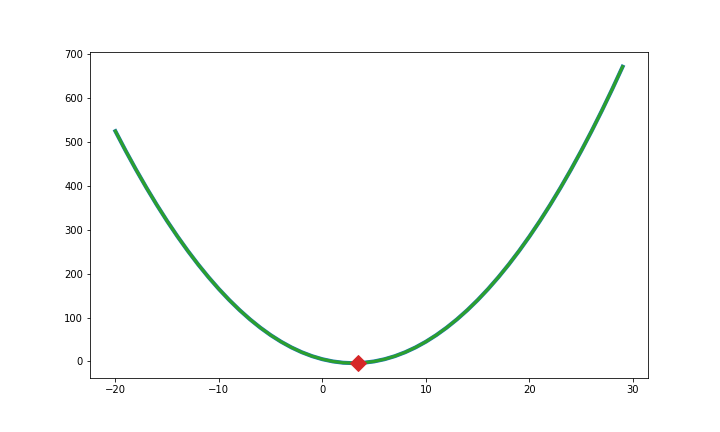
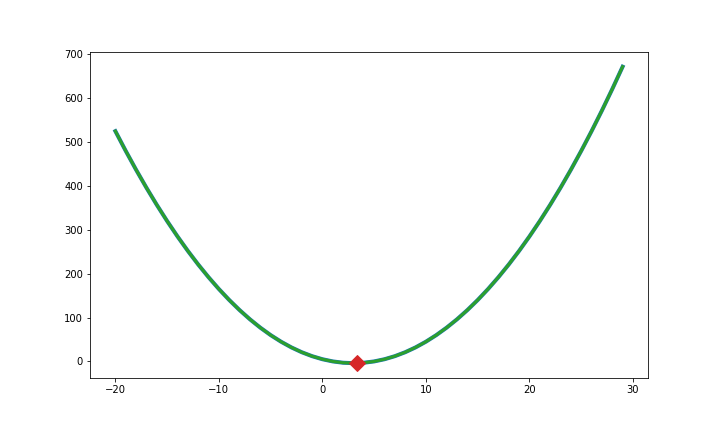
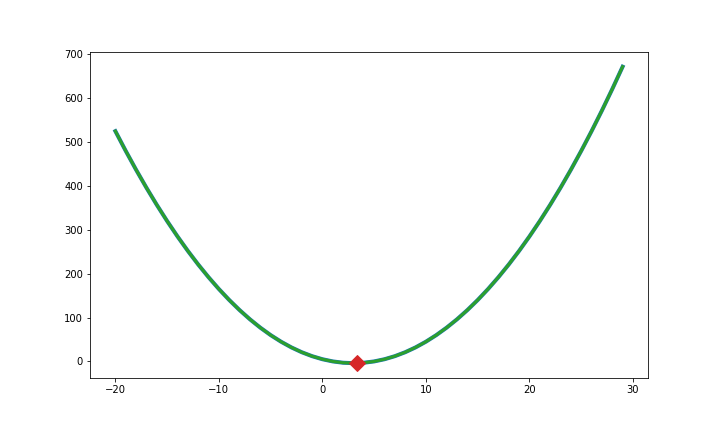
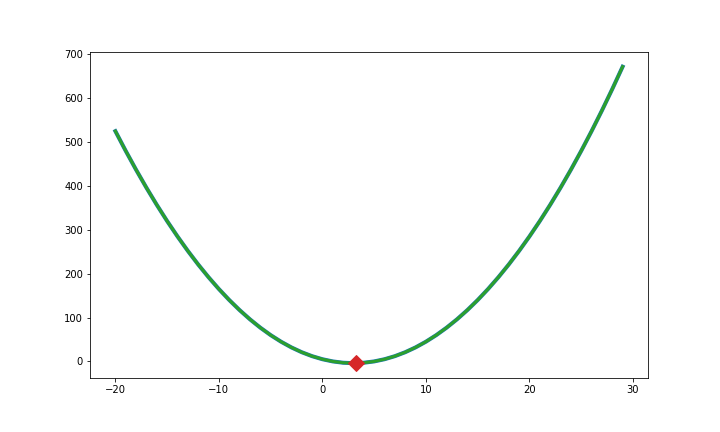
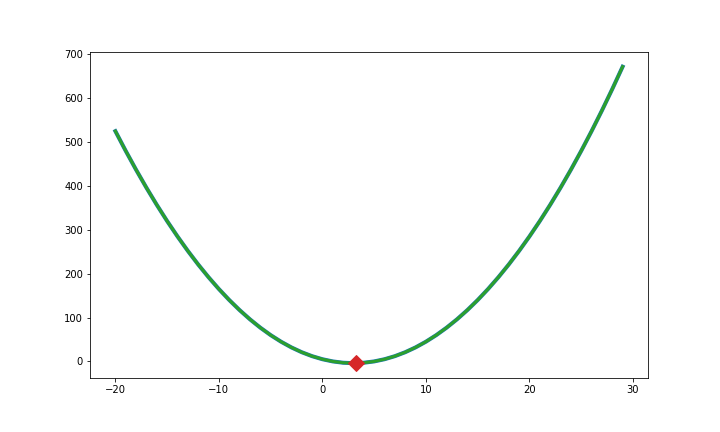
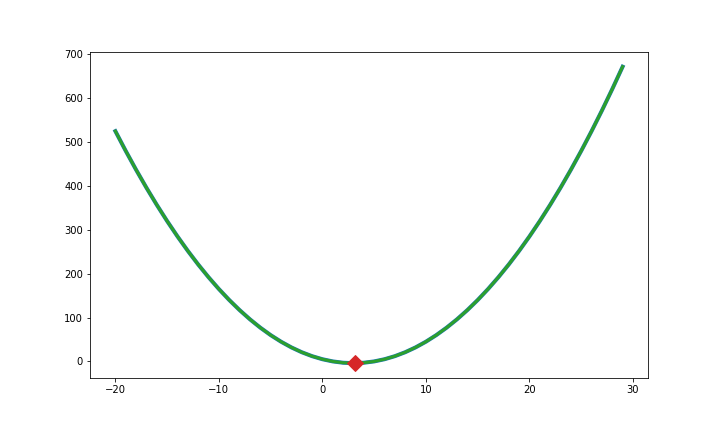
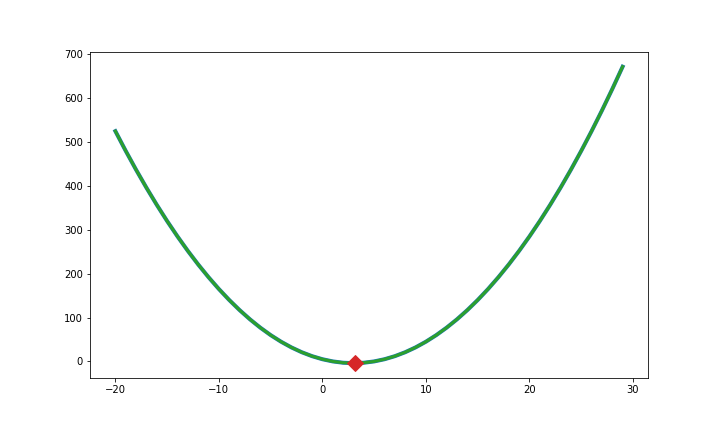
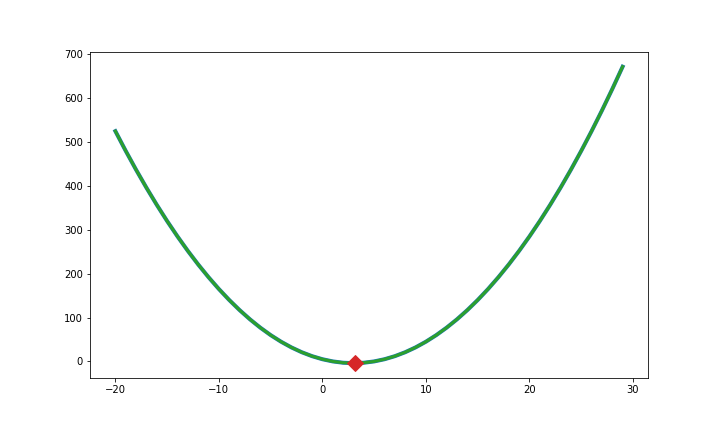
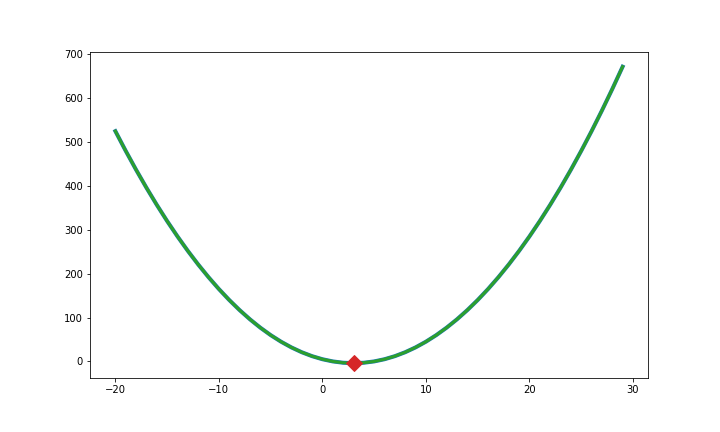
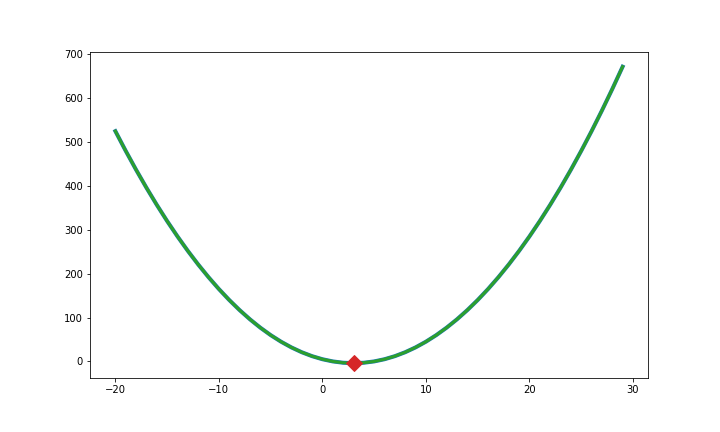
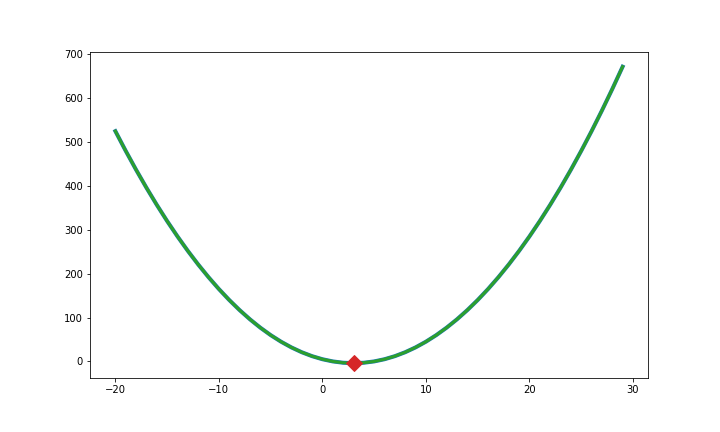
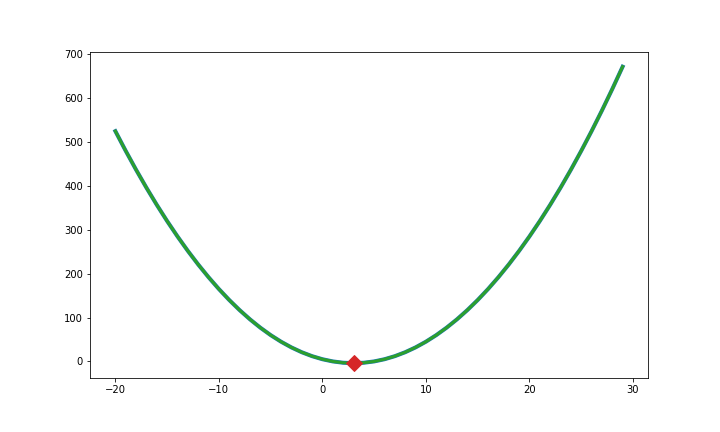

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(xlist,flist, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
fskip=10
xdatafn = lambda i, fskip: fmins[0::fskip][i]
ydatafn = lambda i: f(xdatafn(i, fskip))
i, a = animator(f, xlist, xdatafn, ydatafn, fskip, ax, line)
anim = animation.FuncAnimation(fig, a, init_func=i,
                        frames=len(fmins[0::fskip]), interval=200)
anim.save('1dgd.mp4')
anim